In [193]:
# imports
from __future__ import division, absolute_import, print_function
import os
import numpy as np
import ebf
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table, Column
%matplotlib inline 

In [153]:
# temporary data path stuff
grid_dir = os.path.join(os.environ['HOMEPATH'], 'skysurvey', 'grids', '600')
grid_filehandels = os.listdir(grid_dir)
grid_filehandels

['halo02_4.0Mpc_h158_grid.npy',
 'halo05_4.0Mpc_h158_grid.npy',
 'halo07_4.0Mpc_h158_grid.npy',
 'halo08_4.0Mpc_h158_grid.npy',
 'halo09_4.0Mpc_h158_grid.npy',
 'halo10_4.0Mpc_h158_grid.npy',
 'halo12_4.0Mpc_h158_grid.npy',
 'halo14_4.0Mpc_h158_grid.npy',
 'halo15_4.0Mpc_h158_grid.npy',
 'halo17_4.0Mpc_h158_grid.npy',
 'halo20_4.0Mpc_h158_grid.npy']

In [154]:
halo_ebf_dir = os.path.join(os.environ['HOMEPATH'], 'Desktop', 'halo_ebf')
halo_filehandels = os.listdir(halo_ebf_dir)
halo_filehandels

['halo02.ebf',
 'halo05.ebf',
 'halo07.ebf',
 'halo08.ebf',
 'halo09.ebf',
 'halo10.ebf',
 'halo12.ebf',
 'halo14.ebf',
 'halo15.ebf',
 'halo17.ebf',
 'halo20.ebf']

In [194]:
halo02 = ebf.read(os.path.join(halo_ebf_dir, halo_filehandels[0]))
halo02.keys()

['rad',
 'exbv_solar',
 'teff',
 'mag2',
 'mag1',
 'mag0',
 'wfirst-hst_f606w',
 'satid',
 'vx',
 'vy',
 'vz',
 'wfirst-hst_w149',
 'mtip',
 'log',
 'pz',
 'px',
 'py',
 'wfirst-hst_f160w',
 'feh',
 'wfirst-hst_y106',
 'exbv_schlegel',
 'wfirst-hst_f110w',
 'wfirst-hst_h158',
 'wfirst-hst_f184',
 'lum',
 'exbv_schlegel_inf',
 'mact',
 'glon',
 'wfirst-hst_f814w',
 'popid',
 'glat',
 'wfirst-hst_f475w',
 'alpha',
 'wfirst-hst_z087',
 'wfirst-hst_f555w',
 'center',
 'partid',
 'age',
 'grav',
 'wfirst-hst_j129',
 'smass',
 'fieldid']

In [296]:
appmag = halo02['wfirst-hst_h158'][::100] + 5 * np.log10(4.0 * 1e5)

In [675]:
halo = SkyCoord(x=halo02['px'][::100] + 4.0 * 1e6, y=halo02['py'][::100], z=halo02['pz'][::100], 
                unit='kpc', 
                representation='cartesian')
halo

<SkyCoord (ICRS): (x, y, z) in kpc
    [( 3999926.  ,   1.54849884e+02,  -8.96613083e+01),
     ( 3999926.  ,   1.54828262e+02,  -8.97181931e+01),
     ( 3999925.75,   1.55078033e+02,  -8.96525116e+01), ...,
     ( 4000007.  ,   1.16146493e+00,   5.27706921e-01),
     ( 4000009.5 ,   3.69908512e-01,  -7.41360545e-01),
     ( 4000008.  ,  -1.26424158e+00,   3.98560214e+00)]>

In [677]:
halo_0 = halo.hcrs
halo_0.

<CartesianRepresentation (x, y, z) in kpc
    [( 3999926.  ,  154.49238586,  -8.96613083e+01),
     ( 3999926.  ,  154.49238586,  -8.97181931e+01),
     ( 3999925.75,  154.49237061,  -8.96525116e+01), ...,
     ( 4000007.  ,    1.90735197,   5.27706921e-01),
     ( 4000009.5 ,    0.        ,  -7.41360545e-01),
     ( 4000008.  ,   -1.20796883,   3.98560190e+00)]>

In [627]:
table = Table()
c1 = Column(data=halo_0.ra.hour, name='RA', unit=u.degree)
c2 = Column(data=halo_0.dec, name='Dec', unit=u.degree)
c3 = Column(data=appmag, name='apmag', unit=u.mag)
table.add_columns([c1, c2, c3])

In [303]:
starchart_fh = os.path.join(os.environ['HOMEPATH'], 'Github', 'star-charts-master', 'star-charts-master', 'stardata.csv')
table.write(starchart_fh,
            format='csv', overwrite=True)

In [317]:
c1 = Column(data=halo_0.l, name='lat', unit=u.degree)
c2 = Column(data=halo_0.b, name='long', unit=u.degree)
table.add_columns([c1, c2])

In [634]:
print('ra min  :', halo_0.ra.min())
print('ra max  :', halo_0.ra.max())
print('dec min :', halo_0.dec.min())
print('dec max :', halo_0.dec.max())

ra min  : 0d00m07.475s
ra max  : 359d59m59.1211s
dec min : -89d53m32.7045s
dec max : 88d58m41.0907s


In [318]:
print('lat min  :', table['lat'].min())
print('lat max  :', table['lat'].max())
print('long min :', table['long'].min())
print('long max :', table['long'].max())

lat min  : 206.984969861
lat max  : 206.993417972
long min : -11.4286107819
long max : -11.4203266694


In [618]:
halo_0.dec.degree.min()

-2.7425766

In [659]:
halo_00 = halo_0.galactic

In [620]:
a = halo_00.l.max()

In [621]:
dec_rad.

True

In [660]:
ra_rad = halo_0.ra.wrap_at(180 * u.deg).radian
dec_rad = halo_0.dec.radian

print(ra_rad.min(), ra_rad.mean(), ra_rad.max())
print(dec_rad.min(), dec_rad.mean(), dec_rad.max())

-7.2438e-05 -7.36025e-07 7.35032e-05
-6.82164e-05 -1.22879e-05 6.71237e-05


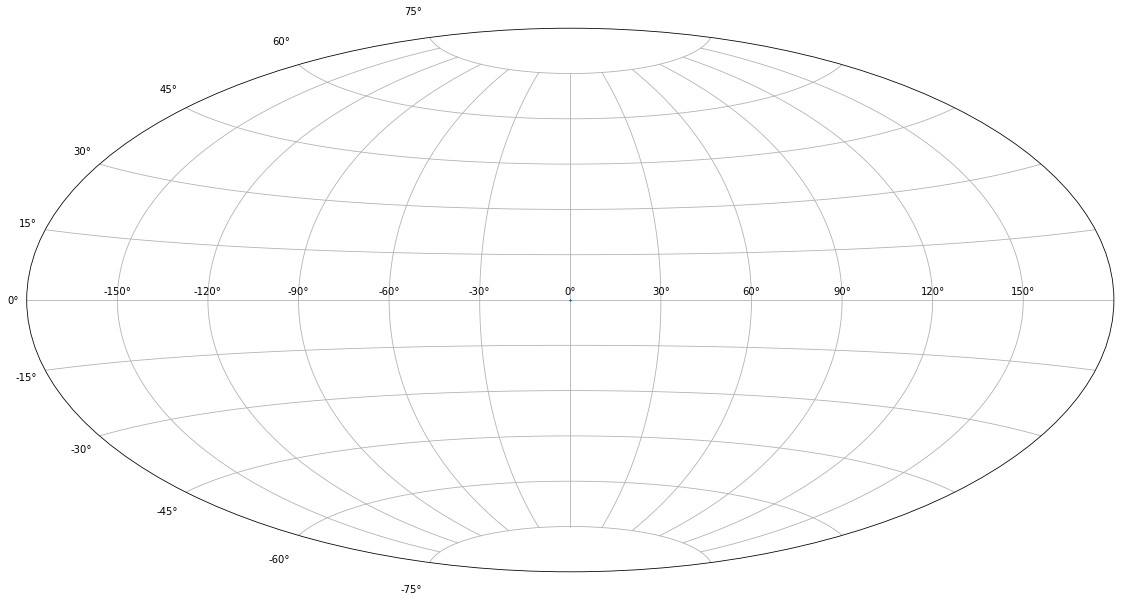

In [661]:
plt.figure(figsize=(20, 10))
plt.subplot(111, projection='aitoff')

plt.grid(True)
plt.plot(ra_rad, dec_rad, '.', markersize=1, alpha=0.3)

plt.show()

In [655]:
halo_0.ra.wrap_at(180 * u.deg).arcminute

array([ 6931.09863281,  6932.48486328,  6936.30419922, ...,   557.93151855,
         133.45550537,  -546.19628906], dtype=float32)

In [679]:
halo.position_angle()

TypeError: position_angle() takes exactly 2 arguments (1 given)

In [674]:
plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)


ax.scatter(halo. , dec_rad, '.', alpha=0.3)
ax.axes.grid(True)
plt.show()

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [612]:
print(halo_00.l[::1000].deg.min())
print(halo_00.l[::1000].deg.mean())
print(halo_00.l[::1000].deg.max())
print(halo_00.b[::1000].deg.min())
print(halo_00.b[::1000].deg.mean())
print(halo_00.b[::1000].deg.max())

0.334871439574
175.41061755
353.303671862
-86.7808485522
-10.1684961508
83.7919320544


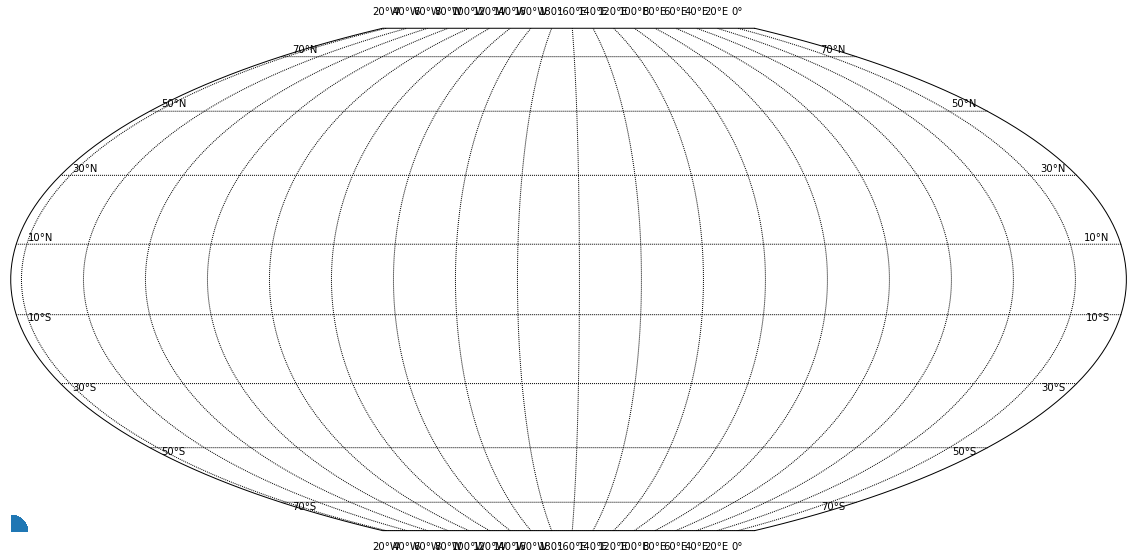

In [581]:
fig = plt.figure(figsize=(20, 20))


m = Basemap(projection='mbtfpq', 
            
            lon_0=halo_00.l.deg.mean(), #70.0, # x axis
            lat_0=-halo_00.b.deg.mean(), #-50.0, # y axis
            
            llcrnrlon=halo_00.l.deg.min(), #100.0, # x
            llcrnrlat=halo_00.b.deg.min(), #-70.0, # y
            
            urcrnrlon=halo_00.l.deg.max(), #50.0, # x
            urcrnrlat=halo_00.b.deg.max(), #-40.0, # y
           )

m.scatter(ra_rad, dec_rad, s=1000)

parallels = np.arange(-90.,90,20.)
m.drawparallels(parallels,labels=[1,1,1,1],fontsize=10)

meridians = np.arange(-180.,180.,20.)
m.drawmeridians(meridians,labels=[1,1,1,1],fontsize=10)

plt.show()

In [474]:
print(halo_00.b
      .min().base)
print(halo_00.b.max().base)
print(halo_00.l.min().base)
print(halo_00.l.max().base)

-89.2612038146
-12.686180039
1.20758898004
357.894677415


In [ ]:
# box placing function
def place_box(_ax, _box, _boxid):
    '''
    _ax is the subplot to plot on
    _box is ((x0, x1), (y0, y1))
    _boxid is the box ID
    
    make a single box from a set of numbers like this: box = ((x0, x1), (y0, y1))
    _ax.vlines(x0, y0, y1)
    _ax.vlines(x1, y0, y1)
    _ax.hlines(y0, x0, x1)
    _ax.hlines(y1, x0, x1)
    '''
    # unpack box tuples
    _age, _feh = _box
    
    # find box center
    a_center = _age[0] + ((_age[1] - _age[0]) * 0.4)
    f_center = _feh[1] + ((_feh[1] - _feh[0]) * 0.7)
    
    # set box label
    box_label = 'R ' + str(_boxid)
    _ax.text(a_center, f_center, box_label, 
             ha='center', 
             fontsize=25, 
             color='k', 
             bbox={'facecolor':'white', 'alpha':0.75, 'pad':2})
    
    # params
    lwidth = 3
    lstyle = 'dashed'
    lclr = 'r'
    
    # set lines
    _ax.vlines(_age[0], _feh[0], _feh[1], 
               colors=lclr, 
               linestyles=lstyle, 
               linewidth=lwidth)
    _ax.vlines(_age[1], _feh[0], _feh[1], 
               colors=lclr, 
               linestyles=lstyle, 
               linewidth=lwidth)
    _ax.hlines(_feh[0], _age[0], _age[1], 
               colors=lclr, 
               linestyles=lstyle, 
               linewidth=lwidth)
    _ax.hlines(_feh[1], _age[0], _age[1], 
               colors=lclr, 
               linestyles=lstyle, 
               linewidth=lwidth)


In [ ]:
# plot heatmap function
def plot_heatmap(grid):
    
    # the figure and subplot
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111)
    
    # the plot
    ax.pcolormesh(np.log10(grid[:, :, 0]), cmap=plt.cm.plasma, vmin=1, vmax=3.3)
    
    # x and y axis limits
    center = grid.shape[0] / 2
    include = grid.shape[0] / 4
    lim0 = center - include
    lim1 = center + include
    ax.set_xlim([lim0, lim1])
    ax.set_ylim([lim0, lim1])
    
    # plot grid
    ax.axes.grid()
    
    # plot show or save
    plt.show()
plot_heatmap(grid)

In [338]:
import matplotlib as mpl
mpl.projections.get_projection_names()

[u'aitoff', u'hammer', u'lambert', u'mollweide', u'polar', u'rectilinear']

In [401]:
from spherical_geometry import graph, great_circle_arc, polygon

In [484]:
points = np.vstack([halo02['px'], halo02['py'], halo02['pz']]).T.tolist()
points

KeyboardInterrupt: 

In [479]:
halo_0.ra.deg

array([  2.54022827e+01,   2.54036865e+01,   2.54620972e+01, ...,
         1.63452148e-01,   5.17578125e-02,   3.59822418e+02], dtype=float32)

In [482]:
polygon.SphericalPolygon()

TypeError: __init__() takes at least 2 arguments (1 given)

In [411]:
points

array([[ -7.39204102e+01,   1.54849884e+02,  -8.96613083e+01],
       [ -7.41189270e+01,   1.54910568e+02,  -8.94683990e+01],
       [ -7.37724609e+01,   1.54666824e+02,  -8.92538910e+01],
       ..., 
       [ -9.02662468e+00,   6.48498917e+00,   1.31755066e+00],
       [  8.09457016e+00,   2.62121081e-01,  -1.23237468e-01],
       [  9.60360336e+00,   2.03584790e+00,  -3.79429996e-01]], dtype=float32)